# Importing Libraries and packages

In [1]:
# Importing all libraries and packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as stats
import statsmodels.api as sm
import statsmodels.formula.api as smi  
import random
import scipy.stats as st
import sklearn.linear_model
from google.colab import drive
%matplotlib inline
%matplotlib notebook
%matplotlib inline
plt.close('all')
import scipy
from matplotlib import pylab
from pylab import *

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Importing Datasets

In [2]:
# Importing the Spotify dataset
drive.mount('/content/drive')
!ls "/content/drive/My Drive/Statistics of Data Science: Investigation of Global Musical Tastes"
!cp "/content/drive/My Drive/Statistics of Data Science: Investigation of Global Musical Tastes/Final database.csv" "Final database.csv"



Mounted at /content/drive
'Data Cleaning and Exploration.ipynb'	  Report.gdoc
'Final database.csv'			  Spotify_OLS.ipynb
'Group 11 - Group Assignment Topic.pdf'  'Summary Report.gdoc'
'Hypothesis testing code.ipynb'		  UNdata_Pop_Language.csv
'Predicting Energy levels (1).ipynb'	  Untitled0.ipynb
'Predicting Energy levels.ipynb'


In [3]:
cols = list(pd.read_csv('Final database.csv',nrows=1))
df = pd.read_csv('Final database.csv', usecols = [i for i in cols if i != cols[1]])
df_full = df
df.head()

,Country,Popularity,Title,Artist,Album/Single,Genre,Artist_followers,Explicit,Album,Release_date,Track_number,Tracks_in_album,danceability,energy,key,loudness,mode,speechiness,acoustics,instrumentalness,liveliness,valence,tempo,duration_ms,time_signature,Genre_new,Days_since_release,Released_after_2017,Explicit_false,Explicit_true,album,compilation,single,bolero,boy band,country,dance/electronic,else,funk,hip hop,...,bing_norm_positive,Argentina,Australia,Austria,Belgium,Brazil,Canada,Chile,Colombia,Costa Rica,Denmark,Ecuador,Finland,France,Germany,Global,Indonesia,Ireland,Italy,Malaysia,Mexico,Netherlands,New Zealand,Norway,Peru,Philippines,Poland,Portugal,Singapore,Spain,Sweden,Switzerland,Taiwan,Turkey,UK,USA,Popu_max,Top10_dummy,Top50_dummy,Cluster
0,Global,31833.95,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,11/5/2018,1,1,0.767,0.709,1,-4.47,1,0.336,0.323,0.0,0.0676,0.72,171.993,258639,4,hip hop,740.0,1.0,1,0,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,1,1,global
1,USA,8.00,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,11/5/2018,1,1,0.767,0.709,1,-4.47,1,0.336,0.323,0.0,0.0676,0.72,171.993,258639,4,hip hop,740.0,1.0,1,0,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,191,0,0,english speaking and nordic
2,Argentina,76924.40,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,11/5/2018,1,1,0.767,0.709,1,-4.47,1,0.336,0.323,0.0,0.0676,0.72,171.993,258639,4,hip hop,740.0,1.0,1,0,0,0,1,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,spanish speaking
3,Belgium,849.60,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,11/5/2018,1,1,0.767,0.709,1,-4.47,1,0.336,0.323,0.0,0.0676,0.72,171.993,258639,4,hip hop,740.0,1.0,1,0,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,126,0,0,english speaking and nordic
4,Switzerland,20739.10,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,11/5/2018,1,1,0.767,0.709,1,-4.47,1,0.336,0.323,0.0,0.0676,0.72,171.993,258639,4,hip hop,740.0,1.0,1,0,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,21,0,1,english speaking and nordic


In [4]:
# Importing UN dataset for languages
drive.mount('/content/drive')
!ls "/content/drive/My Drive/Statistics of Data Science: Investigation of Global Musical Tastes"
!cp "/content/drive/My Drive/Statistics of Data Science: Investigation of Global Musical Tastes/UNdata_Pop_Language.csv" "UNdata_Pop_Language.csv"

cols = list(pd.read_csv('UNdata_Pop_Language.csv',nrows=1))
df_languages = pd.read_csv('UNdata_Pop_Language.csv', usecols = [i for i in cols if i != cols[1]])


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
'Data Cleaning and Exploration.ipynb'	  Report.gdoc
'Final database.csv'			  Spotify_OLS.ipynb
'Group 11 - Group Assignment Topic.pdf'  'Summary Report.gdoc'
'Hypothesis testing code.ipynb'		  UNdata_Pop_Language.csv
'Predicting Energy levels (1).ipynb'	  Untitled0.ipynb
'Predicting Energy levels.ipynb'


# Identifying Countries where the most of the Population Speaks English

In [5]:
# List of all the countries in the datasets
all_countries = pd.unique(df.Country)
print (all_countries)   

['Global' 'USA' 'Argentina' 'Belgium' 'Switzerland' 'Chile' 'Colombia'
 'Costa Rica' 'Germany' 'Ecuador' 'Spain' 'Italy' 'Mexico' 'Peru'
 'Portugal' 'Taiwan' 'UK' 'Austria' 'Australia' 'Canada' 'Finland'
 'France' 'Indonesia' 'Ireland' 'Malaysia' 'Netherlands' 'Norway'
 'New Zealand' 'Philippines' 'Poland' 'Sweden' 'Singapore' 'Turkey'
 'Brazil' 'Denmark']


In [6]:
# Cleaning the language dataset to make it match the spotify dataset (country names)
df_languages['Country or Area'] = df_languages['Country or Area'].replace(["United States of America"],"USA")
df_languages['Country or Area'] = df_languages['Country or Area'].replace(["United Kingdom of Great Britain and Northern Ireland"],"UK")

# Select only english and total from the language dataset, and only the countries in the language dataset that are part of the spotify dataset
language_select_all = df_languages[(df_languages['Language'] == 'English') | (df_languages['Language'] == 'Total')]
language_select = language_select_all[language_select_all['Country or Area'].isin(all_countries)]
lang_countries = language_select.sort_values(['Source Year'], ascending=False).drop_duplicates(subset = ['Country or Area', 'Language'], keep = 'first')

# Calculating the percentage of english speaking people compared to the overall per countries
lang_countries_tot = lang_countries.loc[lang_countries['Language']=='Total']
lang_countries_eng = lang_countries.loc[lang_countries['Language']=='English']
eng_countries = pd.unique(lang_countries_eng['Country or Area'])

perc_eng = (lang_countries_eng.sort_values('Country or Area').groupby('Country or Area')[['Value']].sum()/lang_countries_tot[lang_countries_tot['Country or Area'].isin(eng_countries)].sort_values('Country or Area').groupby('Country or Area')[['Value']].sum())*100

print('Based on the dataset from the UN, most of the population (>72%) in the following countries speak english:\n', perc_eng[perc_eng['Value']>72])

Based on the dataset from the UN, most of the population (>72%) in the following countries speak english:
                      Value
Country or Area           
Australia        72.730944
Canada           82.896771
New Zealand      90.050183
UK               92.192381
USA              82.105167


# Data Cleaning

In [7]:
# Retrieving all the columns name
list(df.columns)

['Country',
 'Popularity',
 'Title',
 'Artist',
 'Album/Single',
 'Genre',
 'Artist_followers',
 'Explicit',
 'Album',
 'Release_date',
 'Track_number',
 'Tracks_in_album',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acoustics',
 'instrumentalness',
 'liveliness',
 'valence',
 'tempo',
 'duration_ms',
 'time_signature',
 'Genre_new',
 'Days_since_release',
 'Released_after_2017',
 'Explicit_false',
 'Explicit_true',
 'album',
 'compilation',
 'single',
 'bolero',
 'boy band',
 'country',
 'dance/electronic',
 'else',
 'funk',
 'hip hop',
 'house',
 'indie',
 'jazz',
 'k-pop',
 'latin',
 'metal',
 'opm',
 'pop',
 'r&b/soul',
 'rap',
 'reggae',
 'reggaeton',
 'rock',
 'trap',
 'syuzhet_norm',
 'bing_norm',
 'afinn_norm',
 'nrc_norm',
 'syuzhet',
 'bing',
 'afinn',
 'nrc',
 'anger',
 'anticipation',
 'disgust',
 'fear',
 'joy',
 'sadness',
 'surprise',
 'trust',
 'negative',
 'positive',
 'n_words',
 'anger_norm',
 'anticipation_norm',
 'disgust_norm',
 'fe

In [8]:
# Inspecting the dataframe columns
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170614 entries, 0 to 170613
Data columns (total 150 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Country              170614 non-null  object 
 1   Popularity           170614 non-null  float64
 2   Title                170614 non-null  object 
 3   Artist               170614 non-null  object 
 4   Album/Single         170614 non-null  object 
 5   Genre                170614 non-null  object 
 6   Artist_followers     170573 non-null  float64
 7   Explicit             170614 non-null  bool   
 8   Album                170614 non-null  object 
 9   Release_date         170614 non-null  object 
 10  Track_number         170614 non-null  int64  
 11  Tracks_in_album      170614 non-null  int64  
 12  danceability         170614 non-null  float64
 13  energy               170614 non-null  float64
 14  key                  170614 non-null  int64  
 15  loudness        

In [9]:
# Conversion of the string (scientific notation) to numeric value
df['Artist_followers'] = pd.to_numeric(df['Artist_followers'],errors='coerce')

# Dataframe with basic musical parameters
df_basic =df.iloc[:, :24]

# Conversion of the fields to floats
for col in df_basic.columns[12:]:
  df_basic[col] = pd.to_numeric(df_basic[col], errors='coerce')

In [10]:
# Conversion of the duration field from miliseconds to minutes
df['duration_min'] = df['duration_ms'].apply(pd.to_numeric, errors = 'coerce')/(1000*60)
df.drop(axis =1, columns='duration_ms', inplace=True)

df_basic['duration_min'] = df_basic['duration_ms'].apply(pd.to_numeric, errors = 'coerce')/(1000*60)
df_basic.drop(axis =1, columns='duration_ms', inplace=True)

In [11]:
df_basic.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170614 entries, 0 to 170613
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Country           170614 non-null  object 
 1   Popularity        170614 non-null  float64
 2   Title             170614 non-null  object 
 3   Artist            170614 non-null  object 
 4   Album/Single      170614 non-null  object 
 5   Genre             170614 non-null  object 
 6   Artist_followers  170573 non-null  float64
 7   Explicit          170614 non-null  bool   
 8   Album             170614 non-null  object 
 9   Release_date      170614 non-null  object 
 10  Track_number      170614 non-null  int64  
 11  Tracks_in_album   170614 non-null  int64  
 12  danceability      170614 non-null  float64
 13  energy            170614 non-null  float64
 14  key               170614 non-null  int64  
 15  loudness          170614 non-null  float64
 16  mode              17

In [12]:
# Fields to drop
cols_drop = ['Title', 'Artist', 'Album/Single','Genre','Explicit','Album','Release_date','Track_number', 'Tracks_in_album']
df_basic.drop(cols_drop, axis=1, inplace=True)

# Subset for the global subset
df_global = df_basic.loc[df.Country == 'Global']

In [13]:
# Inspecting the dataframe columns
df_global.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5461 entries, 0 to 83880
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country           5461 non-null   object 
 1   Popularity        5461 non-null   float64
 2   Artist_followers  5460 non-null   float64
 3   danceability      5461 non-null   float64
 4   energy            5461 non-null   float64
 5   key               5461 non-null   int64  
 6   loudness          5461 non-null   float64
 7   mode              5461 non-null   int64  
 8   speechiness       5461 non-null   float64
 9   acoustics         5461 non-null   float64
 10  instrumentalness  5461 non-null   float64
 11  liveliness        5461 non-null   float64
 12  valence           5461 non-null   float64
 13  tempo             5461 non-null   float64
 14  duration_min      5461 non-null   float64
dtypes: float64(12), int64(2), object(1)
memory usage: 682.6+ KB


In [14]:
df_basic.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170614 entries, 0 to 170613
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Country           170614 non-null  object 
 1   Popularity        170614 non-null  float64
 2   Artist_followers  170573 non-null  float64
 3   danceability      170614 non-null  float64
 4   energy            170614 non-null  float64
 5   key               170614 non-null  int64  
 6   loudness          170614 non-null  float64
 7   mode              170614 non-null  int64  
 8   speechiness       170614 non-null  float64
 9   acoustics         170614 non-null  float64
 10  instrumentalness  170614 non-null  float64
 11  liveliness        170614 non-null  float64
 12  valence           170614 non-null  float64
 13  tempo             170614 non-null  float64
 14  duration_min      170614 non-null  float64
dtypes: float64(12), int64(2), object(1)
memory usage: 19.5+ MB


In [15]:
df_basic.dropna(inplace=True) #drop NAN entriese

# Exploration of the Data

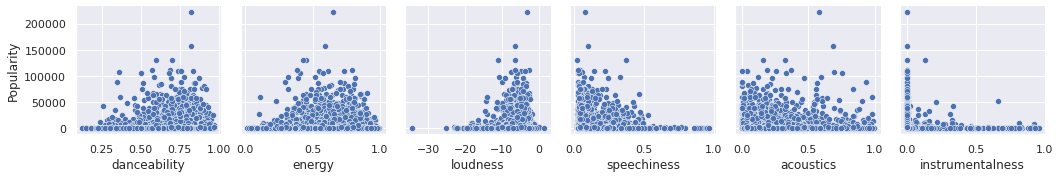

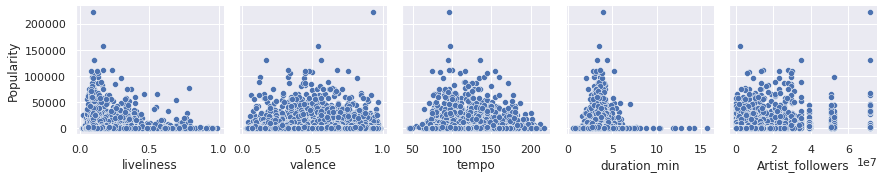

In [16]:
%matplotlib inline
plt.close('all')

sns.set(rc={'figure.figsize':(10,10)})
sns.pairplot(data = df_global,
                  y_vars=['Popularity'],
                  x_vars=['danceability','energy','loudness','speechiness','acoustics','instrumentalness']) #no clear correlations seen with popularity and selected key song characteristics

sns.pairplot(data = df_global,
                  y_vars=['Popularity'],
                  x_vars=['liveliness','valence','tempo','duration_min', 'Artist_followers']) 

In [17]:
musical_features =['danceability', 'energy','loudness','speechiness','acoustics','instrumentalness','liveliness','valence','tempo','duration_min', 'Artist_followers']

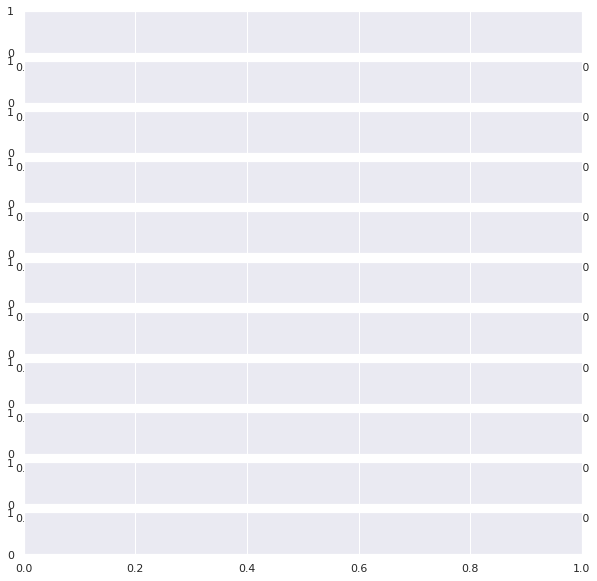

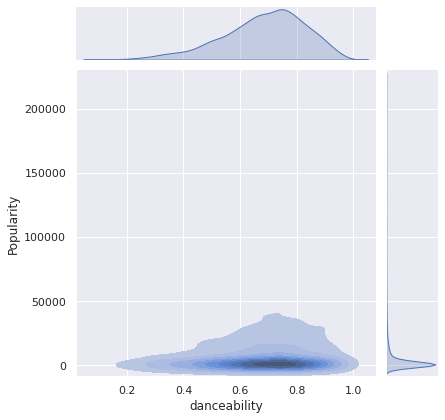

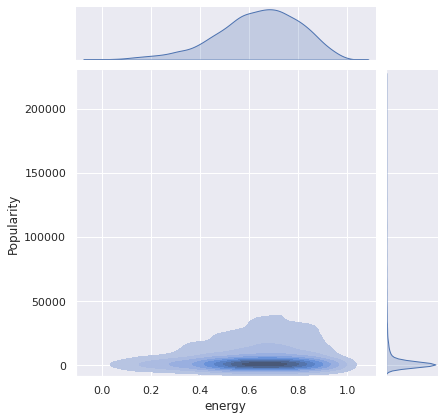

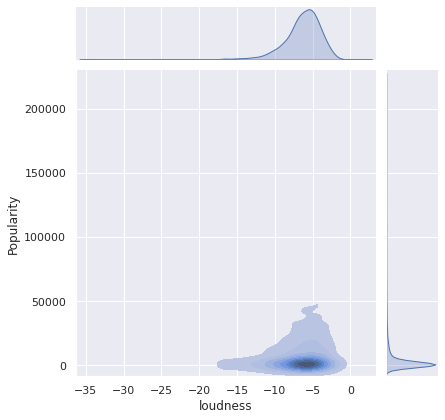

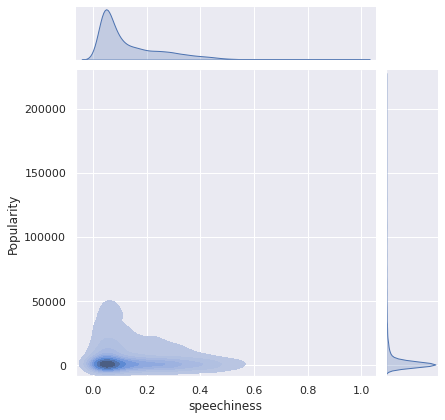

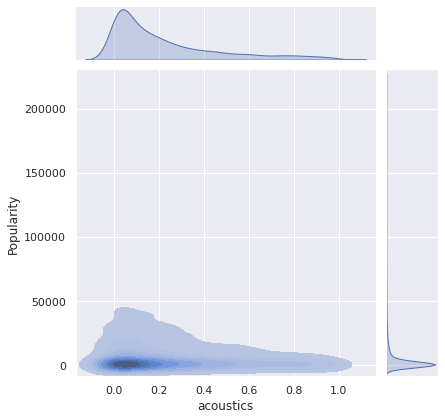

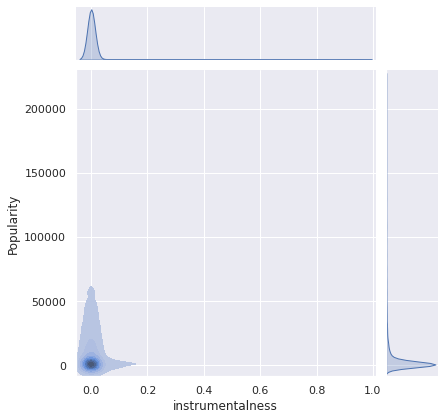

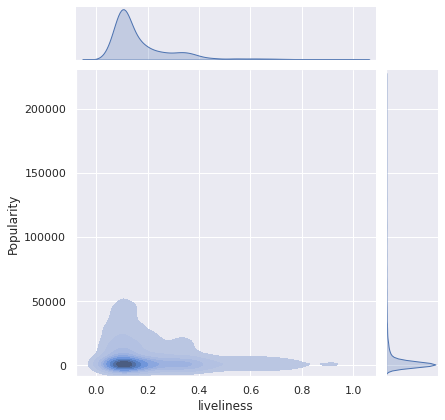

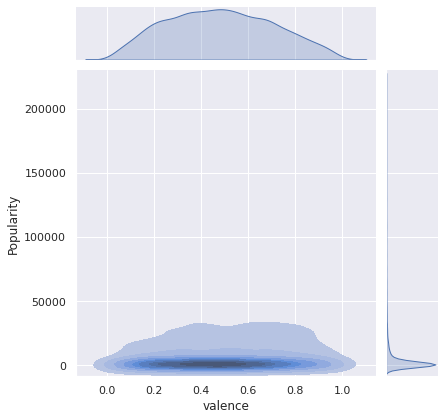

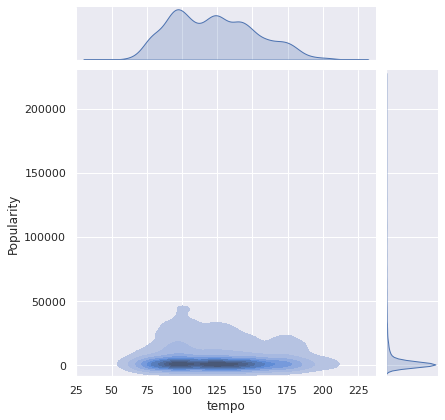

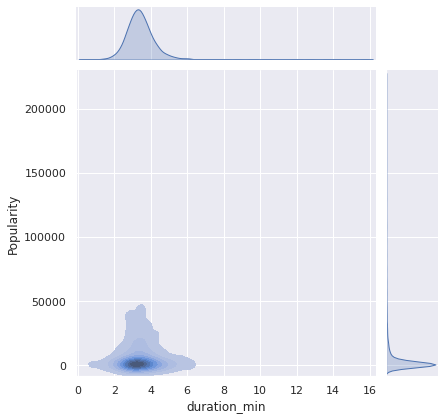

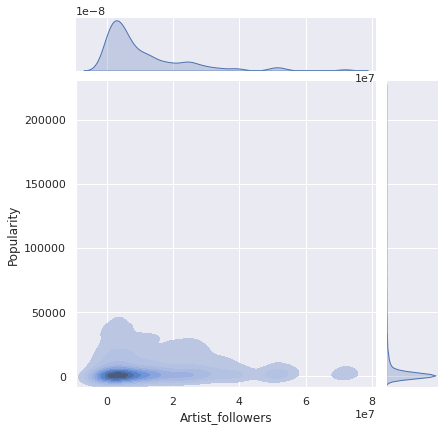

In [18]:
n = 0

fig, axes = plt.subplots(11,1)

for i in musical_features:
  xdata, ydata = df_global[i], df_global['Popularity']
  sns.jointplot(x=xdata, y=ydata, kind="kde", ax=axes[n], fill=True)
  plt.show()
  n += 1

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

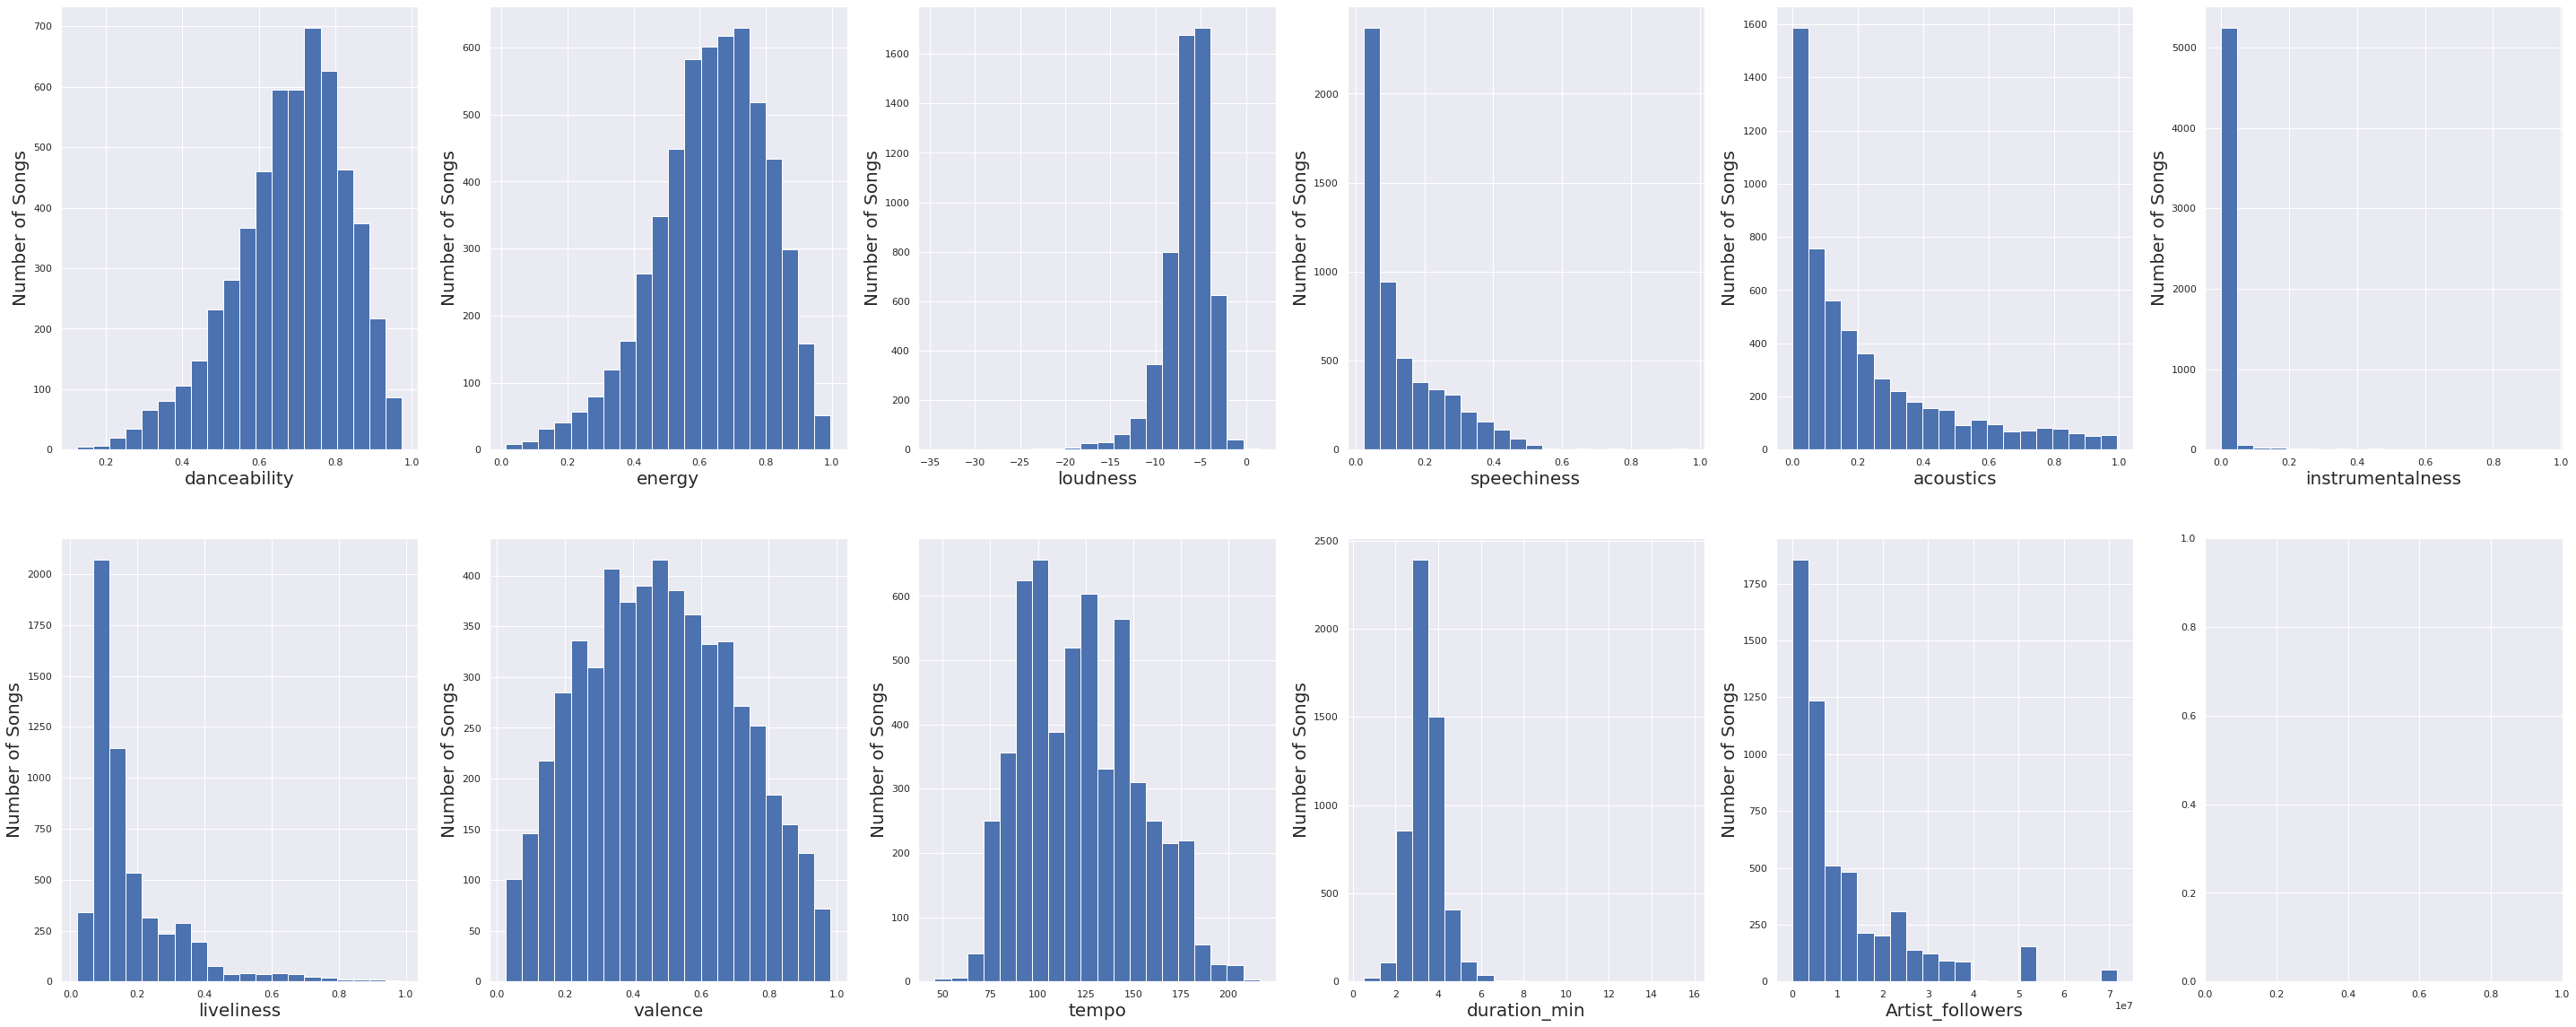

In [19]:
from google.colab import files 

fig, axes = plt.subplots(nrows= 2, ncols=6 ,figsize=(50,20),sharey=False)
k=0
for i in range(2):
  for j in range(6): 
    a = df_global.loc[:,musical_features[k]]
    axes[i][j].hist(a, bins = 20); 
    axes[i][j].set_xlabel(musical_features[k], fontsize = 20)
    axes[i][j].set_ylabel('Number of Songs', fontsize = 20)
    k+=1
    if k>=len(musical_features):
      break
plt.savefig('Global Preferences.jpg')
files.download('Global Preferences.jpg')

In [20]:
# Exploration of potential variables that could explain musical popularity
cols_dummies_type = ['Popularity', 'Artist_followers', 'Explicit_false', 'Explicit_true', 'album', 'compilation', 'single', 'bolero', 'boy band', 'country', 'dance/electronic', 'else', 'funk',
 'hip hop', 'house', 'indie', 'jazz', 'k-pop', 'latin', 'metal', 'opm', 'pop', 'r&b/soul', 'rap', 'reggae', 'reggaeton', 'rock', 'trap', 'Argentina', 'Australia', 'Austria', 'Belgium', 'Brazil', 
 'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Denmark', 'Ecuador', 'Finland', 'France', 'Germany', 'Indonesia', 'Ireland', 'Italy', 'Malaysia', 'Mexico', 'Netherlands', 'New Zealand', 'Norway', 
 'Peru', 'Philippines', 'Poland', 'Portugal', 'Singapore', 'Spain', 'Sweden', 'Switzerland', 'Taiwan', 'Turkey', 'UK', 'USA', 'Popu_max', 'Top10_dummy', 'Top50_dummy']

# Exploration of potential variables that could explain musical popularity through NLP and LDA
cols_dummies_engl = ['Popularity', 'anger', 'anticipation', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'trust', 
 'negative', 'positive', 'n_words', 'anger_norm', 'anticipation_norm', 'disgust_norm', 'fear_norm', 'joy_norm', 'sadness_norm', 'surprise_norm', 'trust_norm', 'negative_norm', 'positive_norm', 'anger_norm2', 
 'anticipation_norm2', 'disgust_norm2', 'fear_norm2', 'joy_norm2', 'sadness_norm2', 'surprise_norm2', 'trust_norm2', 'negative_norm2', 'positive_norm2', 'negative_bog_jr', 'positive_bog_jr', 'Bayes', 'Negative_Bayes', 
 'Neutral_Bayes', 'Positive_Bayes', 'Celebrate', 'Desire', 'Explore', 'Fun', 'Hope', 'Love', 'Nostalgia', 'Thug', 'bing_norm_negative', 'bing_norm_neutral', 'bing_norm_positive', 'Australia', 'Canada', 
 'New Zealand', 'UK', 'USA', 'Popu_max', 'Top10_dummy', 'Top50_dummy']

df_dummy_type = df[cols_dummies_type]
df_dummy_engl = df[cols_dummies_engl]

In [21]:
df_dummy_type.info(verbose=True, null_counts=True) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170614 entries, 0 to 170613
Data columns (total 65 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Popularity        170614 non-null  float64
 1   Artist_followers  170573 non-null  float64
 2   Explicit_false    170614 non-null  int64  
 3   Explicit_true     170614 non-null  int64  
 4   album             170614 non-null  int64  
 5   compilation       170614 non-null  int64  
 6   single            170614 non-null  int64  
 7   bolero            170614 non-null  int64  
 8   boy band          170614 non-null  int64  
 9   country           170614 non-null  int64  
 10  dance/electronic  170614 non-null  int64  
 11  else              170614 non-null  int64  
 12  funk              170614 non-null  int64  
 13  hip hop           170614 non-null  int64  
 14  house             170614 non-null  int64  
 15  indie             170614 non-null  int64  
 16  jazz              17

In [22]:
df_dummy_engl.info(verbose=True, null_counts=True) # a lot songs are not in english even in english speaking countries. The entries will be dropped

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170614 entries, 0 to 170613
Data columns (total 57 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Popularity          170614 non-null  float64
 1   anger               71866 non-null   float64
 2   anticipation        71866 non-null   float64
 3   disgust             71866 non-null   float64
 4   fear                71866 non-null   float64
 5   joy                 71866 non-null   float64
 6   sadness             71866 non-null   float64
 7   surprise            71866 non-null   float64
 8   trust               71866 non-null   float64
 9   negative            71866 non-null   float64
 10  positive            71866 non-null   float64
 11  n_words             71866 non-null   float64
 12  anger_norm          71866 non-null   float64
 13  anticipation_norm   71866 non-null   float64
 14  disgust_norm        71866 non-null   float64
 15  fear_norm           71866 non-null

In [23]:
df_dummy_engl.dropna(inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [24]:
type_corr_assessment =  df_dummy_type.corr(method='spearman')
type_corr_assessment['Popularity'].abs().sort_values(ascending=False).head(15) # correlation of every musical type parameters with the popularity

Popularity          1.000000
Popu_max            0.866468
Top50_dummy         0.653970
Top10_dummy         0.416660
single              0.122047
Artist_followers    0.118070
album               0.114534
latin               0.108534
else                0.084328
metal               0.083274
rock                0.070909
pop                 0.056520
Taiwan              0.054980
Ecuador             0.037712
Argentina           0.036799
Name: Popularity, dtype: float64

In [25]:
engl_corr_assessment =  df_dummy_engl.corr(method='spearman')
engl_corr_assessment['Popularity'].abs().sort_values(ascending=False).head(15) # correlation of every english language musical parameters with the popularity

Popularity           1.000000
Popu_max             0.872623
Top50_dummy          0.665550
Top10_dummy          0.421797
positive_norm        0.074702
anticipation_norm    0.071743
Explore              0.069122
trust_norm           0.068564
negative_norm        0.061536
n_words              0.060377
positive_bog_jr      0.059221
joy_norm             0.058132
Desire               0.051436
Celebrate            0.044419
sadness_norm         0.042919
Name: Popularity, dtype: float64

# Analysis

In [26]:
# Create column for continents

# ( currently Turkey is listed as European )

continents = {
    'Global':['Global'],
    'Asia':['Taiwan','Indonesia','Malaysia','Philippines','Singapore'],
    'North America':['Canada','Costa Rica','Mexico','USA'],
    'South America':['Argentina','Chile','Colombia','Ecuador','Spain','Peru','Portugal','Brazil'],
    'Europe':['Belgium','Switzerland','Germany','Italy','UK','Austria','Finland','France','Ireland','Netherlands','Norway','Poland','Sweden','Denmark','Turkey'],
    'Australia_Oceania':['Australia','New Zealand'] }

continents_list = []

for country in df_basic['Country']:
    for key, value in continents.items():
        if country in value:
            continents_list.append(key)

df_basic['Continent'] = continents_list
df_basic[['Continent','Country']].head()

,Continent,Country
0,Global,Global
1,North America,USA
2,South America,Argentina
3,Europe,Belgium
4,Europe,Switzerland


In [27]:
# OLS RESULTS, EVERY COUNTRY, ANY NUMBER OF VARIABLES

# function ( data, list of variables (beginning with dependent variable), grouping (country / continent) )

def function( df, list_of_variables, category):
    lst_len = len(list_of_variables)

    for group in df_basic[category].unique():
        print('Grouping: ',category, ' - ', group)
        print('Number of variables: ', lst_len)
        df2 = df_basic[df_basic[category] == group]
        df2 = df2[list_of_variables]
        print('Rows: ', len(df2))
        df2 = df2.dropna()
    
        results = sm.OLS(endog=df2[df2.columns[0]], exog=df2[df2.columns[1:]]).fit()

        print(results.summary())
        print('\n\n\n\n')

In [28]:
function( df_basic, ['Popularity','danceability', 'energy','loudness','speechiness','acoustics','instrumentalness','liveliness','valence','tempo','duration_min', 'Artist_followers'], 'Continent' )

Grouping:  Continent  -  Global
Number of variables:  12
Rows:  5460
                                 OLS Regression Results                                
Dep. Variable:             Popularity   R-squared (uncentered):                   0.173
Model:                            OLS   Adj. R-squared (uncentered):              0.171
Method:                 Least Squares   F-statistic:                              103.3
Date:                Mon, 02 Aug 2021   Prob (F-statistic):                   1.32e-214
Time:                        16:31:33   Log-Likelihood:                         -58998.
No. Observations:                5460   AIC:                                  1.180e+05
Df Residuals:                    5449   BIC:                                  1.181e+05
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t  

In [29]:
function( df_basic, ['Popularity', 'Artist_followers'], 'Continent' )

Grouping:  Continent  -  Global
Number of variables:  2
Rows:  5460
                                 OLS Regression Results                                
Dep. Variable:             Popularity   R-squared (uncentered):                   0.125
Model:                            OLS   Adj. R-squared (uncentered):              0.124
Method:                 Least Squares   F-statistic:                              776.5
Date:                Mon, 02 Aug 2021   Prob (F-statistic):                   6.97e-160
Time:                        16:31:33   Log-Likelihood:                         -59152.
No. Observations:                5460   AIC:                                  1.183e+05
Df Residuals:                    5459   BIC:                                  1.183e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t   

In [30]:
# OLS RESULTS, EVERY COUNTRY, ANY NUMBER OF VARIABLES

# function2 ( data, list of variables (beginning with dependent variable), grouping (country / continent) )

def function2( df, list_of_variables, category):
    lst_len = len(list_of_variables)

    for group in df_basic[category].unique():
        print('Grouping: ',category, ' - ', group)
        print('Number of variables: ', lst_len)
        df2 = df_basic[df_basic[category] == group]
        df2 = df2[list_of_variables]
        print('n: ', len(df2))
        df2 = df2.dropna()
    
        if len(list_of_variables) == 2:
            y = df2[df2.columns[0]]
            X = df2[df2.columns[1]]
            X = sm.add_constant(X)

            results = sm.OLS(endog=y, exog= X).fit()
            intercept, slope = results.params
            df2['y_est'] = intercept + slope * df2[df2.columns[1]]
            plt.plot(df2[df2.columns[1]],df2[df2.columns[0]], 'o')

            plt.plot(df2[df2.columns[1]], df2.y_est, 'r-', label = 'Regression Line')
            #plt.vlines(df2[df2.columns[1]], df2.y_est, df2[df2.columns[0]], linestyles = 'dashed', alpha=0.5, label = 'errors')
            
            plt.xlabel(df2.columns[1])
            plt.ylabel(df2.columns[0])
            plt.legend()
            plt.show()

        else:
            results = sm.OLS(endog=df2[df2.columns[0]], exog=df2[df2.columns[1]]).fit()


        print(results.summary())
        print('\n\n\n\n')


Grouping:  Continent  -  Global
Number of variables:  2
n:  5460


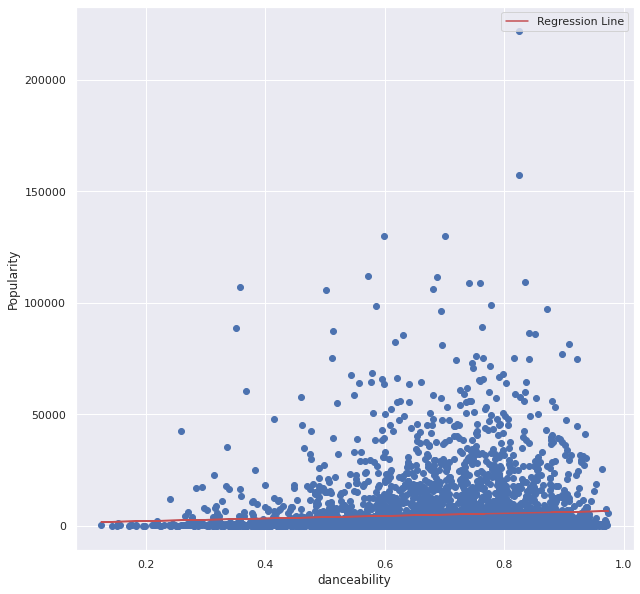

                            OLS Regression Results                            
Dep. Variable:             Popularity   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     26.40
Date:                Mon, 02 Aug 2021   Prob (F-statistic):           2.87e-07
Time:                        16:31:34   Log-Likelihood:                -59106.
No. Observations:                5460   AIC:                         1.182e+05
Df Residuals:                    5458   BIC:                         1.182e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          896.5221    781.053      1.148   

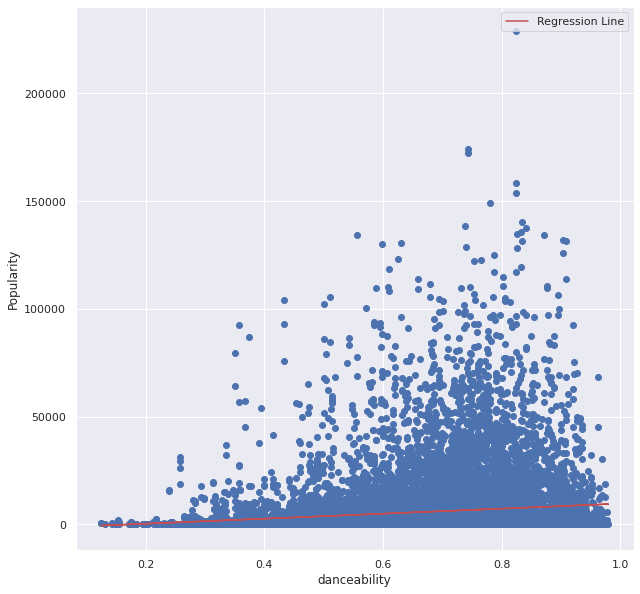

                            OLS Regression Results                            
Dep. Variable:             Popularity   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     268.8
Date:                Mon, 02 Aug 2021   Prob (F-statistic):           5.64e-60
Time:                        16:31:35   Log-Likelihood:            -1.9844e+05
No. Observations:               18086   AIC:                         3.969e+05
Df Residuals:                   18084   BIC:                         3.969e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -2059.6579    492.842     -4.179   

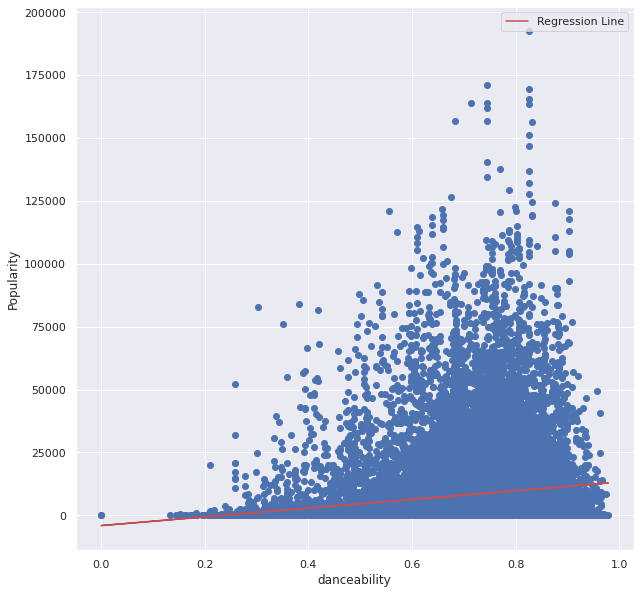

                            OLS Regression Results                            
Dep. Variable:             Popularity   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     595.5
Date:                Mon, 02 Aug 2021   Prob (F-statistic):          4.01e-130
Time:                        16:31:35   Log-Likelihood:            -3.0256e+05
No. Observations:               27281   AIC:                         6.051e+05
Df Residuals:                   27279   BIC:                         6.051e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -4055.6519    495.289     -8.188   

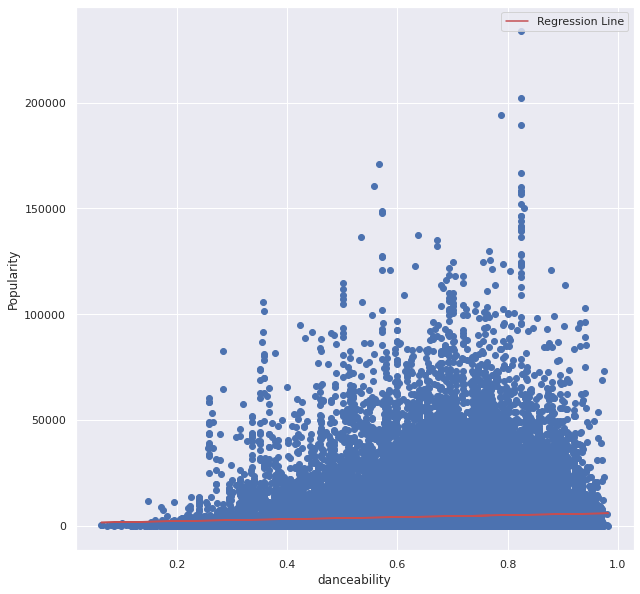

                            OLS Regression Results                            
Dep. Variable:             Popularity   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     381.7
Date:                Mon, 02 Aug 2021   Prob (F-statistic):           7.98e-85
Time:                        16:31:36   Log-Likelihood:            -9.7366e+05
No. Observations:               91134   AIC:                         1.947e+06
Df Residuals:                   91132   BIC:                         1.947e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1173.2487    166.132      7.062   

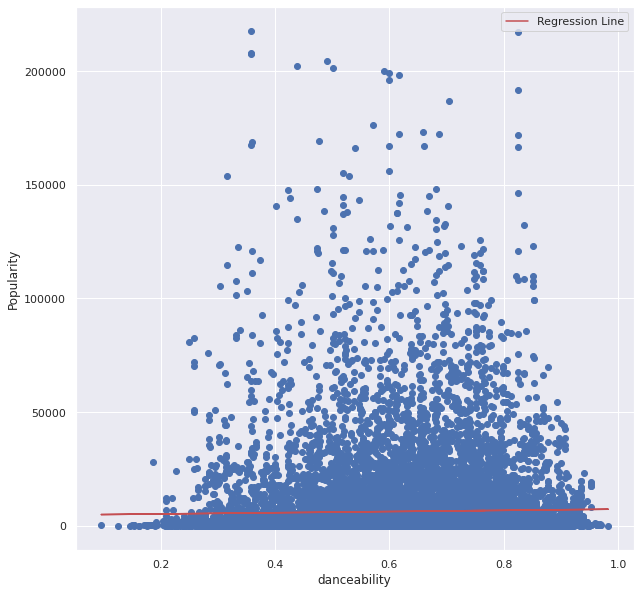

                            OLS Regression Results                            
Dep. Variable:             Popularity   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     11.38
Date:                Mon, 02 Aug 2021   Prob (F-statistic):           0.000744
Time:                        16:31:36   Log-Likelihood:            -2.3341e+05
No. Observations:               20987   AIC:                         4.668e+05
Df Residuals:                   20985   BIC:                         4.668e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         4609.8491    496.930      9.277   

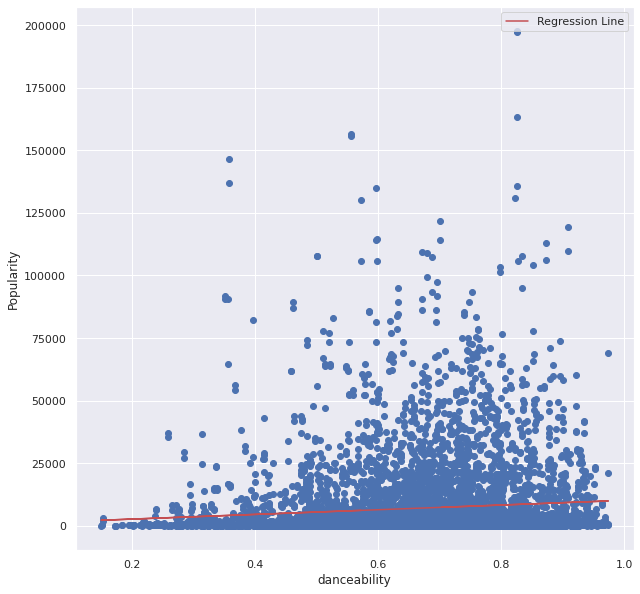

                            OLS Regression Results                            
Dep. Variable:             Popularity   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     63.61
Date:                Mon, 02 Aug 2021   Prob (F-statistic):           1.74e-15
Time:                        16:31:37   Log-Likelihood:                -84209.
No. Observations:                7625   AIC:                         1.684e+05
Df Residuals:                    7623   BIC:                         1.684e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          722.4640    792.211      0.912   

In [31]:
function2(df_basic, ['Popularity','danceability'],'Continent')

Grouping:  Continent  -  Global
Number of variables:  2
n:  5460


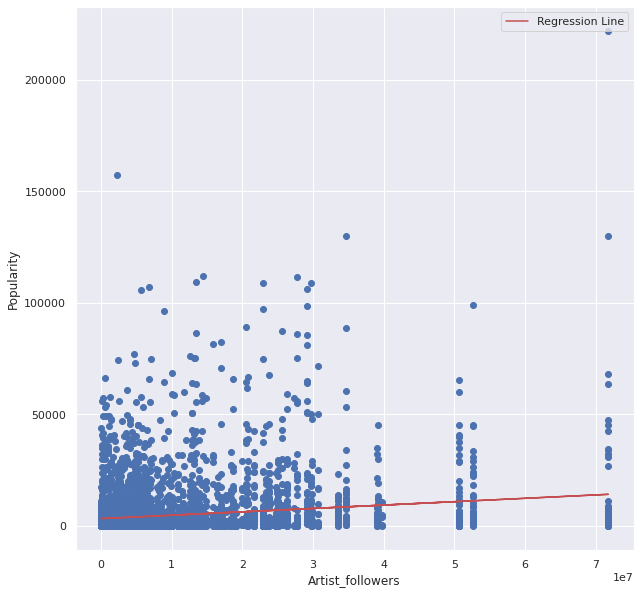

                            OLS Regression Results                            
Dep. Variable:             Popularity   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     146.9
Date:                Mon, 02 Aug 2021   Prob (F-statistic):           2.20e-33
Time:                        16:31:37   Log-Likelihood:                -59047.
No. Observations:                5460   AIC:                         1.181e+05
Df Residuals:                    5458   BIC:                         1.181e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             3139.2416    213.888  

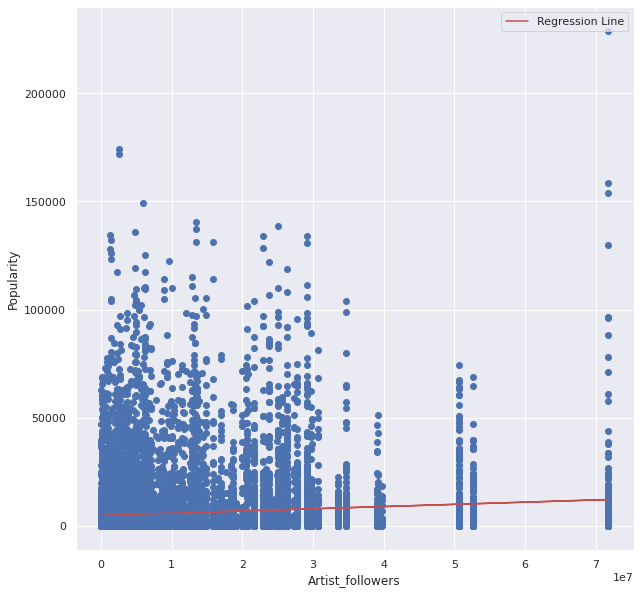

                            OLS Regression Results                            
Dep. Variable:             Popularity   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     162.0
Date:                Mon, 02 Aug 2021   Prob (F-statistic):           5.86e-37
Time:                        16:31:38   Log-Likelihood:            -1.9849e+05
No. Observations:               18086   AIC:                         3.970e+05
Df Residuals:                   18084   BIC:                         3.970e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             4740.5333    135.790  

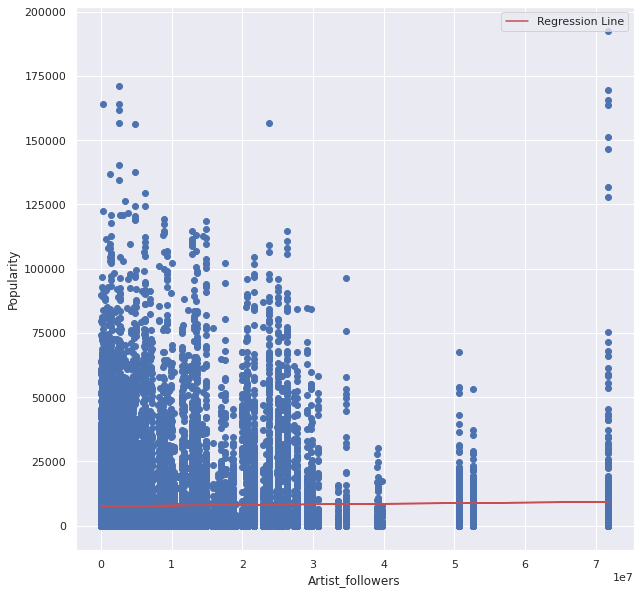

                            OLS Regression Results                            
Dep. Variable:             Popularity   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     10.06
Date:                Mon, 02 Aug 2021   Prob (F-statistic):            0.00152
Time:                        16:31:38   Log-Likelihood:            -3.0285e+05
No. Observations:               27281   AIC:                         6.057e+05
Df Residuals:                   27279   BIC:                         6.057e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             7565.4308    122.269  

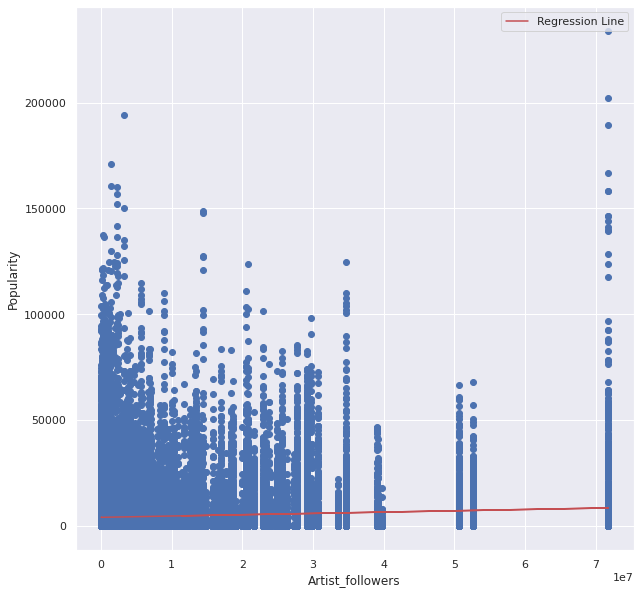

                            OLS Regression Results                            
Dep. Variable:             Popularity   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     489.4
Date:                Mon, 02 Aug 2021   Prob (F-statistic):          3.68e-108
Time:                        16:31:39   Log-Likelihood:            -9.7361e+05
No. Observations:               91134   AIC:                         1.947e+06
Df Residuals:                   91132   BIC:                         1.947e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             3911.7625     40.099  

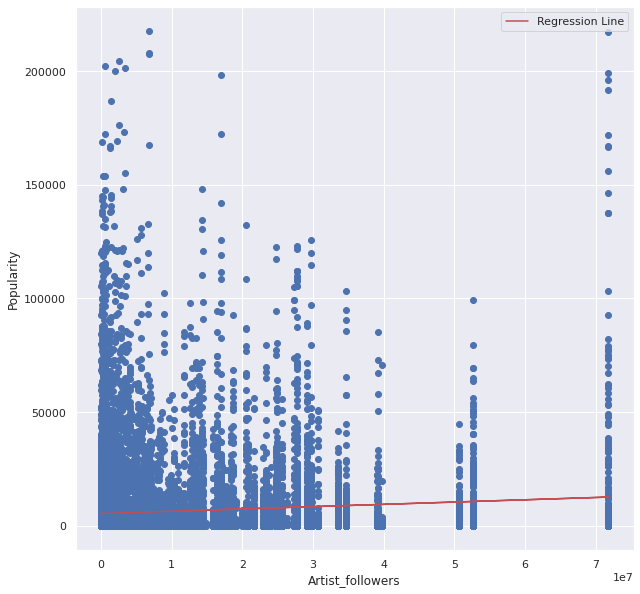

                            OLS Regression Results                            
Dep. Variable:             Popularity   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     145.3
Date:                Mon, 02 Aug 2021   Prob (F-statistic):           2.37e-33
Time:                        16:31:39   Log-Likelihood:            -2.3334e+05
No. Observations:               20987   AIC:                         4.667e+05
Df Residuals:                   20985   BIC:                         4.667e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             5331.1084    135.608  

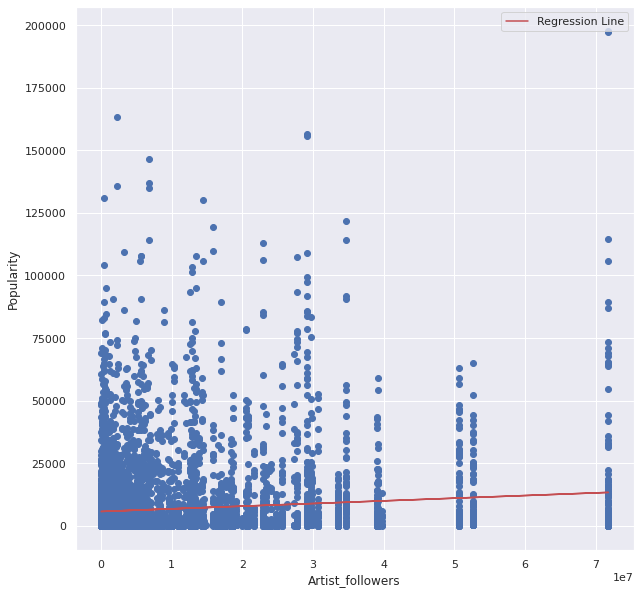

                            OLS Regression Results                            
Dep. Variable:             Popularity   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     80.80
Date:                Mon, 02 Aug 2021   Prob (F-statistic):           3.10e-19
Time:                        16:31:40   Log-Likelihood:                -84200.
No. Observations:                7625   AIC:                         1.684e+05
Df Residuals:                    7623   BIC:                         1.684e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             5642.8725    221.728  

In [32]:
function2(df_basic, ['Popularity','Artist_followers'],'Continent')

# Addendum: Predicting energy level

In [33]:
#Convert object columns to numerics 
cols = ['energy','loudness','compilation','single','bolero','boy band','country','dance/electronic','else','funk','hip hop','house','indie','jazz','k-pop','latin','metal','opm','pop','r&b/soul','rap','reggae','reggaeton','rock','trap']


df_basic_var = df[cols].apply(pd.to_numeric, errors = 'coerce', axis = 1)
df_basic_var['Country']=df['Country']

df_basic_var = df_basic_var.rename(columns={"boy band": "boyband",'hip hop':'hiphop','else':'els','k-pop':'kpop','dance/electronic':'danceelectronic','r&b/soul':'rbsoul'})

df_basic_var = df_basic_var[df_basic_var.Country == 'Global']

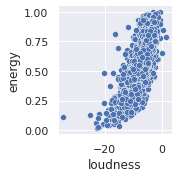

In [34]:
sns.pairplot(data = df_global,
                  y_vars=['energy'],
                  x_vars=['loudness'])

In [35]:
from sklearn.model_selection import train_test_split

df_basic_var_train, df_basic_var_test = train_test_split(df_basic_var, test_size=0.3)

### Model 1

In [36]:
import math

#run OLS to predict energy level with loudness
d = df_basic_var_train

m1 = smi.ols('energy ~ loudness', data = d )
m1 = m1.fit()
print (m1.summary())

                            OLS Regression Results                            
Dep. Variable:                 energy   R-squared:                       0.545
Model:                            OLS   Adj. R-squared:                  0.545
Method:                 Least Squares   F-statistic:                     4577.
Date:                Mon, 02 Aug 2021   Prob (F-statistic):               0.00
Time:                        16:32:01   Log-Likelihood:                 2924.8
No. Observations:                3822   AIC:                            -5846.
Df Residuals:                    3820   BIC:                            -5833.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9447      0.005    194.690      0.0

In [37]:
d

,energy,loudness,compilation,single,bolero,boyband,country,danceelectronic,els,funk,hiphop,house,indie,jazz,kpop,latin,metal,opm,pop,rbsoul,rap,reggae,reggaeton,rock,trap,Country
13539,0.740,-7.185,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Global
26529,0.711,-5.693,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Global
18726,0.224,-12.431,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Global
23199,0.686,-7.665,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Global
25391,0.680,-4.755,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,Global
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63814,0.770,-4.631,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Global
79176,0.524,-7.247,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Global
35542,0.891,-2.760,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Global
14413,0.812,-3.995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,Global


### Model 2

In [38]:
#Predict enegry level with loudness and also song type

d = df_basic_var_train

m2 = smi.ols('energy ~ loudness + compilation + single + bolero + boyband + country + danceelectronic + rbsoul + els+ kpop+ funk + hiphop + house + indie + jazz +  latin + metal + opm + pop+ rap +  reggaeton + rock + trap', data =d)
m2 = m2.fit()
print (m2.summary())

                            OLS Regression Results                            
Dep. Variable:                 energy   R-squared:                       0.576
Model:                            OLS   Adj. R-squared:                  0.574
Method:                 Least Squares   F-statistic:                     258.0
Date:                Mon, 02 Aug 2021   Prob (F-statistic):               0.00
Time:                        16:32:01   Log-Likelihood:                 3058.4
No. Observations:                3822   AIC:                            -6075.
Df Residuals:                    3801   BIC:                            -5944.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.8968      0.008    1

### Influence Plot

In [39]:
#Get influence data 
influence = m2.get_influence()
inf_sum = influence.summary_frame()
inf_sum

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:695: RuntimeWarning: invalid value encountered in sqrt
  return self.resid / sigma / np.sqrt(1 - hii)
/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:729: RuntimeWarning: invalid value encountered in sqrt
  dffits_ = self.resid_studentized_internal * np.sqrt(hii / (1 - hii))
/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:758: RuntimeWarning: invalid value encountered in sqrt
  dffits_ = self.resid_studentized_external * np.sqrt(hii / (1 - hii))


,dfb_Intercept,dfb_loudness,dfb_compilation,dfb_single,dfb_bolero,dfb_boyband,dfb_country,dfb_danceelectronic,dfb_rbsoul,dfb_els,dfb_kpop,dfb_funk,dfb_hiphop,dfb_house,dfb_indie,dfb_jazz,dfb_latin,dfb_metal,dfb_opm,dfb_pop,dfb_rap,dfb_reggaeton,dfb_rock,dfb_trap,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
13539,0.012229,0.001883,-0.008449,-0.011264,0.000655,-0.005377,-0.002896,-0.005136,-0.006145,0.082919,-0.005865,-0.002837,-0.010546,-0.004495,-0.004614,-5.202622,-0.007085,-0.005636,-5.945003,-0.009188,-0.009094,-0.002499,-0.006939,-0.003946,0.000377,0.793178,0.014178,0.095121,0.793139,0.095116
26529,-0.000724,0.001350,-0.000365,0.009666,0.000178,0.000114,-0.000183,-0.001011,0.000003,-0.000043,-0.000111,-0.000908,0.000422,-0.001255,-0.000168,-5.832516,-0.001116,0.000454,-4.378343,0.006243,0.000114,-0.000554,0.000361,-0.000453,0.000015,0.551465,0.001178,0.018937,0.551414,0.018935
18726,0.014419,0.034559,0.005454,0.010639,-0.000600,0.000413,0.001324,-0.000335,0.005120,0.003287,-0.000794,-0.000978,0.005429,-0.000828,0.001806,-3.821312,-0.002803,0.002027,-1.425579,-0.008485,0.004445,-0.001724,0.004582,0.001504,0.000091,-0.934039,0.002492,-0.046684,-0.934023,-0.046684
23199,0.001589,-0.006950,-0.005257,-0.019606,0.000521,-0.001376,-0.000510,0.000656,-0.002060,-0.001134,-0.000934,0.001196,-0.003701,0.001211,-0.000967,-9.308324,0.000791,-0.002222,-2.517422,0.014637,-0.002665,0.000630,-0.002647,-0.000319,0.000074,1.241527,0.001158,0.042265,1.241616,0.042268
25391,-0.001993,-0.002449,0.000417,0.002235,-0.000027,0.000302,0.000016,0.000058,-0.000048,-0.000041,0.000367,-0.000015,0.000282,0.000005,0.000080,-3.908103,0.000333,0.000276,-12.162049,0.000057,-0.004686,0.000137,0.000118,-0.000006,0.000003,-0.174679,0.002390,-0.008550,-0.174657,-0.008549
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63814,0.006918,0.003923,0.000760,0.005553,-0.000497,-0.003077,-0.001925,-0.004440,-0.003524,-0.003148,-0.003688,-0.003191,-0.005655,-0.004283,-0.002922,-6.242917,-0.005832,-0.002759,-1.729439,-0.006565,-0.005356,-0.002244,-0.003723,0.052068,0.000136,0.375609,0.022592,0.057105,0.375566,0.057099
79176,-0.001171,0.001214,0.001747,0.006903,-0.000171,0.000498,0.000138,-0.000232,0.000565,0.000292,0.000381,-0.000408,0.001166,-0.000420,0.000289,-1.278606,-0.000183,0.000749,-4.401558,-0.005131,0.000818,-0.000166,0.000806,0.000059,0.000009,-0.426738,0.001134,-0.014381,-0.426693,-0.014379
35542,0.006654,0.008290,0.000197,0.005083,-0.000190,-0.001784,-0.000931,0.040044,-0.001244,-0.001242,-0.002358,-0.002018,-0.002476,-0.002712,-0.001449,-5.406992,-0.003966,-0.001318,-0.392333,-0.003327,-0.002430,-0.001643,-0.001431,-0.001476,0.000102,0.496535,0.009873,0.049581,0.496486,0.049576
14413,0.009971,0.013474,-0.001512,-0.009560,0.000084,-0.001298,0.000049,-0.000215,0.000624,0.000460,-0.001667,0.000051,-0.000824,-0.000010,-0.000193,-4.924165,-0.001615,-0.001078,-2.292815,0.000075,0.019296,-0.000706,-0.000165,0.000178,0.000054,0.708169,0.002555,0.035844,0.708122,0.035841




Leverage vs. Studentized Residuals
Line2D(_line0)
Line2D(_line1)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


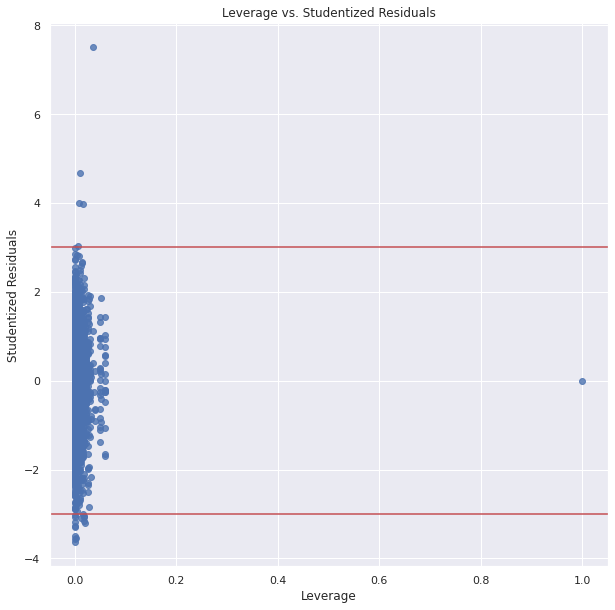

In [42]:
#Influence plot using seaborn 
student_resid = influence.resid_studentized_external
(cooks, p) = influence.cooks_distance
(dffits, p) = influence.dffits
leverage = influence.hat_matrix_diag
print ('\n')
print ('Leverage vs. Studentized Residuals')
sns.regplot(leverage, m2.resid_pearson,  fit_reg=False)
plt.title('Leverage vs. Studentized Residuals')
plt.xlabel('Leverage')
plt.ylabel('Studentized Residuals')
print(plt.axhline(y=-3, color='r', linestyle='-'))
print(plt.axhline(y=3, color='r', linestyle='-'))

In [43]:
#Calculate dffits https://www.statsmodels.org/stable/generated/statsmodels.stats.outliers_influence.OLSInfluence.html#statsmodels.stats.outliers_influence.OLSInfluence
dffits = (21/len(df_basic_var))**(1/2)
print(dffits)

0.06201168882851215


In [44]:
len(df_basic_var)

5461

In [45]:
#Indetify outliers of indexes to remove 
inf_sum['flagdffits'] = inf_sum['dffits'] > dffits
drop_list = inf_sum[inf_sum['flagdffits']==True].index.to_list()
len(drop_list)

426

In [46]:
#drop outliers 
df_basic_var_train_2 = df_basic_var_train.drop(drop_list)
len(df_basic_var_train_2)

3396

### Model 3


In [48]:
#model has improved without outliers 
d = df_basic_var_train_2

m3 = smi.ols('energy ~ loudness + compilation + single + bolero + boyband + country + danceelectronic + rbsoul + els+ kpop+ funk + hiphop + house + indie + jazz +  latin + metal + opm + pop+ rap + reggaeton + rock + trap', data =d)
m3 = m3.fit()
print (m3.summary())

                            OLS Regression Results                            
Dep. Variable:                 energy   R-squared:                       0.640
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     300.0
Date:                Mon, 02 Aug 2021   Prob (F-statistic):               0.00
Time:                        16:51:36   Log-Likelihood:                 3163.1
No. Observations:                3396   AIC:                            -6284.
Df Residuals:                    3375   BIC:                            -6155.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.8796      0.008    1

### Model 4

In [49]:
#Remove features with low pvalue less than 0.05
d = df_basic_var_train_2

m4 = smi.ols('energy ~ loudness +  single + danceelectronic + els+ kpop+ hiphop + house + latin + metal + pop+ rap + reggaeton + rock + trap', data =d)
m4 = m4.fit()
print (m4.summary())

                            OLS Regression Results                            
Dep. Variable:                 energy   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     427.5
Date:                Mon, 02 Aug 2021   Prob (F-statistic):               0.00
Time:                        16:51:37   Log-Likelihood:                 3158.6
No. Observations:                3396   AIC:                            -6287.
Df Residuals:                    3381   BIC:                            -6195.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.8845      0.009    1

In [50]:
df_basic_var_test['prediction'] = m4.predict(df_basic_var_test)

df_basic_var_test

from sklearn.metrics import r2_score

r2_score(df_basic_var_test['energy'], df_basic_var_test['prediction'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0.5208397535962543

In [52]:
df_basic_var_train_2

,energy,loudness,compilation,single,bolero,boyband,country,danceelectronic,els,funk,hiphop,house,indie,jazz,kpop,latin,metal,opm,pop,rbsoul,rap,reggae,reggaeton,rock,trap,Country
26529,0.711,-5.693,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Global
18726,0.224,-12.431,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Global
23199,0.686,-7.665,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Global
25391,0.680,-4.755,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,Global
26908,0.679,-6.051,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Global
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17846,0.642,-4.552,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Global
63814,0.770,-4.631,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Global
79176,0.524,-7.247,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Global
35542,0.891,-2.760,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Global


In [54]:
df_basic_var_random = df_basic_var_train_2.drop(['Country'],axis = 1)


### Random Forest Model

In [55]:
labels = np.array(df_basic_var_random['energy'])
features= df_basic_var_random.drop('energy', axis = 1)
feature_list = list(features.columns)
features = np.array(features)

from sklearn.model_selection import train_test_split
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.2, random_state = 42)

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 5000, random_state = 42)
rf.fit(train_features, train_labels)

from sklearn.metrics import accuracy_score
predicted = rf.predict(test_features)
accuracy = r2_score(test_labels, predicted)

accuracy

0.5894730943838988

##Hypothesis Testing



In [56]:
list(df.columns)

['Country',
 'Popularity',
 'Title',
 'Artist',
 'Album/Single',
 'Genre',
 'Artist_followers',
 'Explicit',
 'Album',
 'Release_date',
 'Track_number',
 'Tracks_in_album',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acoustics',
 'instrumentalness',
 'liveliness',
 'valence',
 'tempo',
 'time_signature',
 'Genre_new',
 'Days_since_release',
 'Released_after_2017',
 'Explicit_false',
 'Explicit_true',
 'album',
 'compilation',
 'single',
 'bolero',
 'boy band',
 'country',
 'dance/electronic',
 'else',
 'funk',
 'hip hop',
 'house',
 'indie',
 'jazz',
 'k-pop',
 'latin',
 'metal',
 'opm',
 'pop',
 'r&b/soul',
 'rap',
 'reggae',
 'reggaeton',
 'rock',
 'trap',
 'syuzhet_norm',
 'bing_norm',
 'afinn_norm',
 'nrc_norm',
 'syuzhet',
 'bing',
 'afinn',
 'nrc',
 'anger',
 'anticipation',
 'disgust',
 'fear',
 'joy',
 'sadness',
 'surprise',
 'trust',
 'negative',
 'positive',
 'n_words',
 'anger_norm',
 'anticipation_norm',
 'disgust_norm',
 'fear_norm',
 'joy_

In [57]:
cols = ['Popularity','danceability','energy','loudness','speechiness','acoustics','instrumentalness','liveliness','valence','tempo']


df_basic_var_hyp = df[cols].apply(pd.to_numeric, errors = 'coerce', axis = 1)
df_basic_var_hyp['Country']=df['Country']
df_basic_var_hyp['Cluster']=df['Cluster']


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

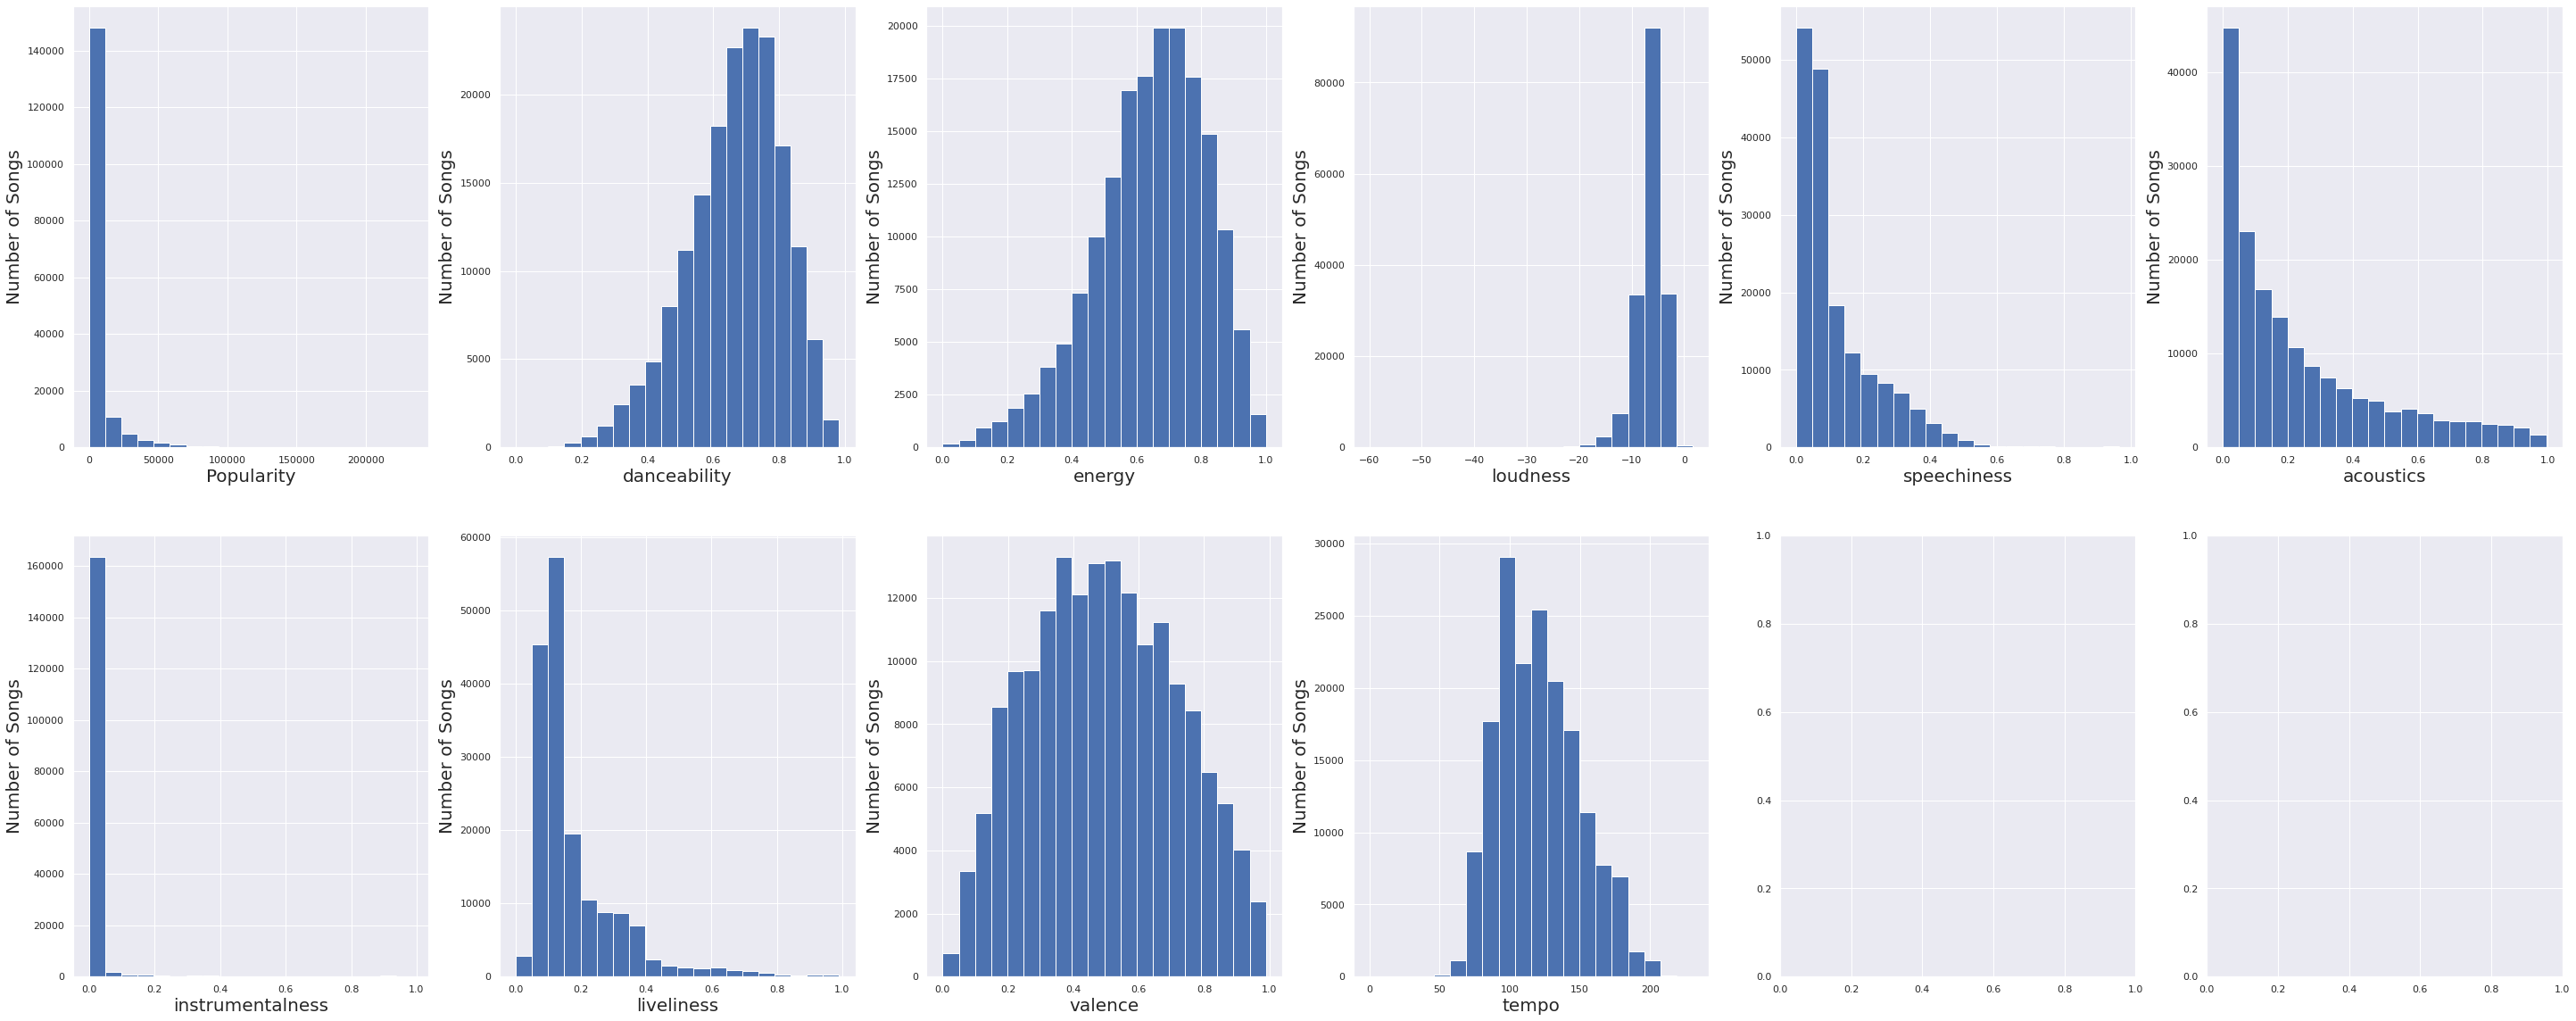

In [58]:
fig, axes = plt.subplots(nrows= 2, ncols=6 ,figsize=(50,20),sharey=False)
k=0
for i in range(2):
  for j in range(6): 
    a = df_basic_var_hyp.loc[:,cols[k]]
    axes[i][j].hist(a, bins = 20); 
    axes[i][j].set_xlabel(cols[k], fontsize = 20)
    axes[i][j].set_ylabel('Number of Songs', fontsize = 20)
    k+=1
    if k>=len(cols):
      break
plt.savefig('Global Preferences.jpg')
files.download('Global Preferences.jpg')

#Danceability and energy shows normality signs 

In [59]:
#function to return plots for the feature
import scipy
from matplotlib import pylab
from pylab import *

def normality(data,feature):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    sns.kdeplot(data[feature])
    plt.subplot(1,2,2)
    scipy.stats.probplot(data[feature],plot=pylab)
    plt.show()

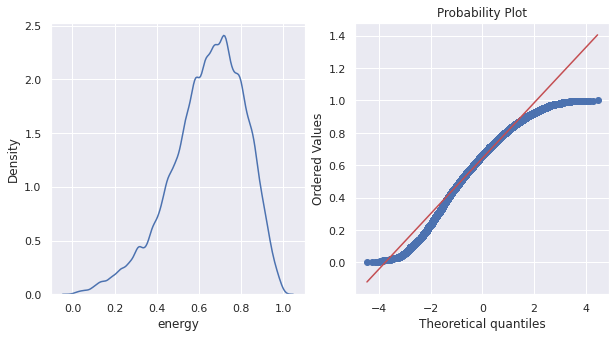

None


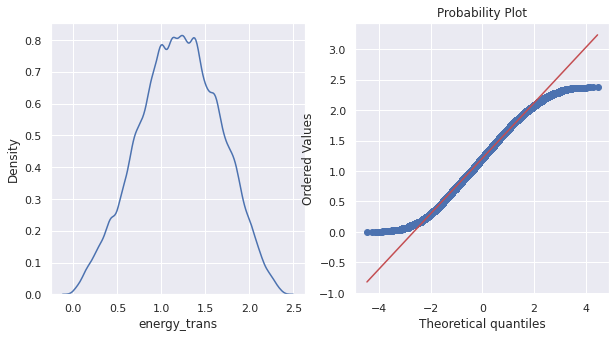

None


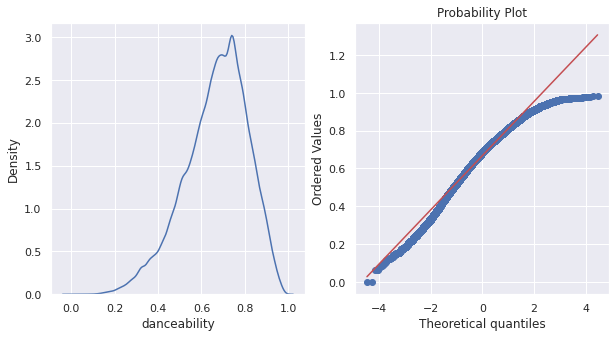

None


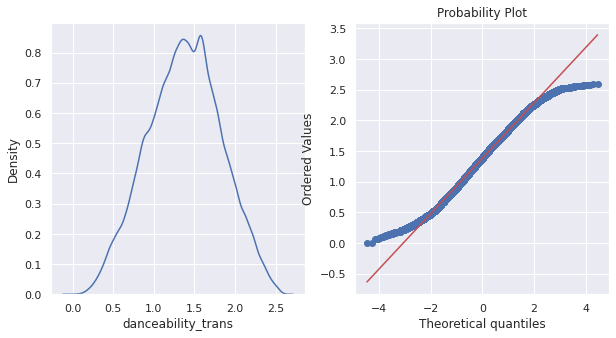

None


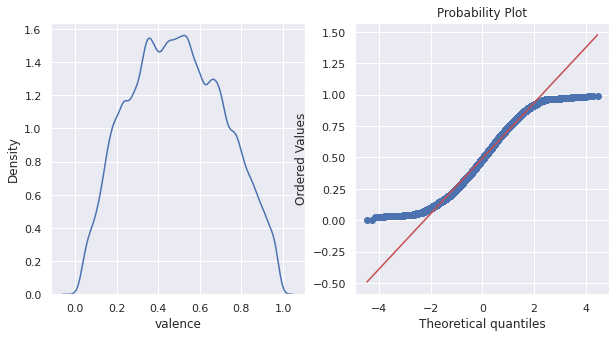

None


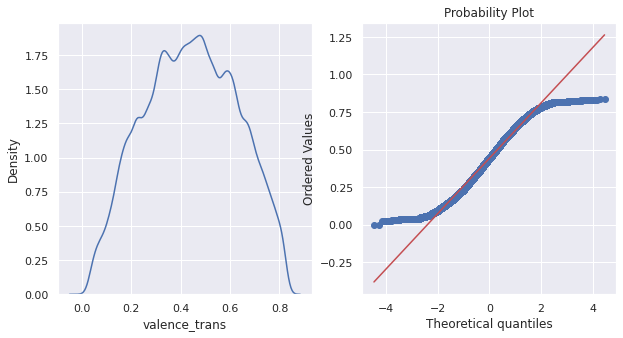

None


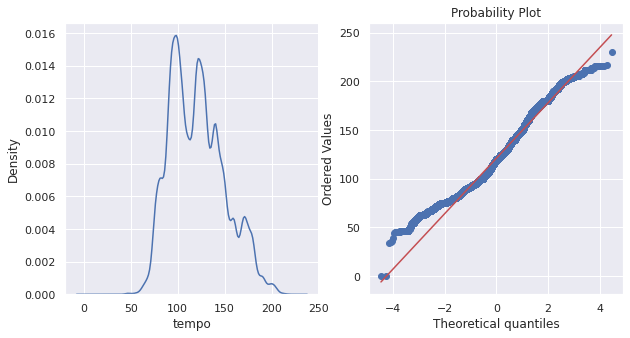

None


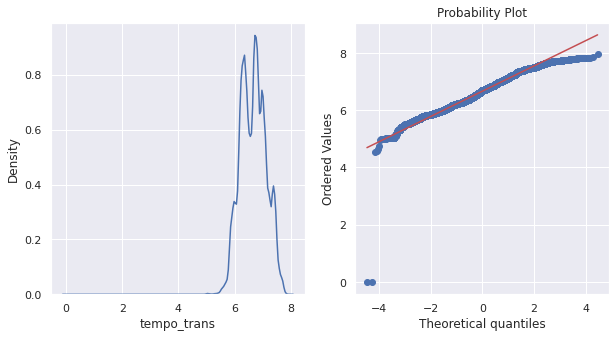

None


In [60]:


df_basic_var_hyp['energy_trans'] = scipy.stats.yeojohnson(df_basic_var_hyp['energy'], lmbda=None)[0]

print(normality(df_basic_var_hyp,'energy'))
print(normality(df_basic_var_hyp,'energy_trans'))

df_basic_var_hyp['danceability_trans'] = scipy.stats.yeojohnson(df_basic_var_hyp['danceability'], lmbda=None)[0]

print(normality(df_basic_var_hyp,'danceability'))
print(normality(df_basic_var_hyp,'danceability_trans'))

df_basic_var_hyp['valence_trans'] = scipy.stats.yeojohnson(df_basic_var_hyp['valence'], lmbda=None)[0]

print(normality(df_basic_var_hyp,'valence'))
print(normality(df_basic_var_hyp,'valence_trans'))

df_basic_var_hyp['tempo_trans'] = scipy.stats.yeojohnson(df_basic_var_hyp['tempo'], lmbda=None)[0]

print(normality(df_basic_var_hyp,'tempo'))
print(normality(df_basic_var_hyp,'tempo_trans'))



In [61]:
info_mean = df_basic_var_hyp.groupby('Cluster')[['energy_trans','danceability_trans','valence_trans']].mean()
info_std = df_basic_var_hyp.groupby('Cluster')[['energy_trans','danceability_trans','valence_trans']].std()
info_sample = df_basic_var_hyp.groupby('Cluster')[['energy_trans','danceability_trans','valence_trans']].count()

info_mean


,energy_trans,danceability_trans,valence_trans
Cluster,,,
english speaking and nordic,1.188345,1.361032,0.426630
global,1.187829,1.429564,0.431404
southern europe and portuguese heritage,1.205969,1.379456,0.437529
spanish speaking,1.293777,1.444826,0.511371


In [62]:
country_list = df_basic_var_hyp['Country'].to_list()

In [63]:
list1 = ['southern europe and portuguese heritage','english speaking and nordic','spanish speaking']
feature = ['energy_trans','danceability_trans','valence_trans']
y = 0 

cluster = []
feature_1 = []
p_value1 = []
c = []

for i in feature:
  a = feature[y]
  x = 0
  for i in list1:
    mean = info_mean[info_mean.index == 'global'][a].iloc[0]
    std = info_std[info_std.index == 'global'][a].iloc[0]
    sample_size = info_sample[info_sample.index == 'global'][a].iloc[0]
    mean_test =  info_mean[info_mean.index == list1[x]][a].iloc[0]
    se = std/sqrt(sample_size)
    p_value = st.norm.cdf(mean_test, loc=mean, scale=se)
    cluster_v = list1[x]
    feature_1_v = feature[y]          
    cluster.append(cluster_v)
    feature_1.append(feature_1_v)
    p_value1.append(p_value)      
    x = x+1 
  y = y+1

summary = pd.DataFrame({'cluster':cluster,'feature':feature_1,'p_value':p_value1})
summary

,cluster,feature,p_value
0,southern europe and portuguese heritage,energy_trans,9.987419e-01
1,english speaking and nordic,energy_trans,5.342931e-01
2,spanish speaking,energy_trans,1.000000e+00
3,southern europe and portuguese heritage,danceability_trans,9.190091e-16
4,english speaking and nordic,danceability_trans,7.542977e-28
5,spanish speaking,danceability_trans,9.922801e-01
6,southern europe and portuguese heritage,valence_trans,9.921777e-01
7,english speaking and nordic,valence_trans,2.979797e-02
8,spanish speaking,valence_trans,1.000000e+00


In [64]:
list1 = ['southern europe and portuguese heritage','english speaking and nordic','spanish speaking']
feature = ['energy_trans','danceability_trans','valence_trans']
y = 0 

cluster = []
feature_1 = []
p_value1 = []
c = []

for i in feature:
  a = feature[y]
  x = 0
  for i in list1:
    mean = info_mean[info_mean.index == 'global'][a].iloc[0]
    std = info_std[info_std.index == 'global'][a].iloc[0]
    sample_size = info_sample[info_sample.index == 'global'][a].iloc[0]
    mean_test =  info_mean[info_mean.index == list1[x]][a].iloc[0]
    se = std/sqrt(sample_size)
    p_value = st.norm.cdf(mean_test, loc=mean, scale=se)
    cluster_v = list1[x]
    feature_1_v = feature[y]
    if p_value < 0.05:          
      cluster.append(cluster_v)
      feature_1.append(feature_1_v)
      p_value1.append(p_value)      
    x = x+1 
  y = y+1


summary = pd.DataFrame({'cluster':cluster,'feature':feature_1,'p_value':p_value1})
summary

,cluster,feature,p_value
0,southern europe and portuguese heritage,danceability_trans,9.190091e-16
1,english speaking and nordic,danceability_trans,7.542977e-28
2,english speaking and nordic,valence_trans,2.979797e-02
